In [ ]:
import morePVs_output as opm
import morePVs as mpv
import os
import en_utilities as um
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Plotting Total Building Costs
-----------------------------------


Repeating barchart plot from APSRC 2017 paper
1) for EN
2) for btm
For range of:
* PV sizes
* external tariffs and amortization periods

A) Repeat plot, replot for other parameters

B) Plot bau, en, en and pv for range of pvs for each site
   x different tariffs and terms
   x with / without parent FiT
   
   
 


In [3]:
#
# Need to set this up using combined_value2 as the study
project='EN1_value_of_pv2'
study_name='combined_value5_6'
base_path='C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_3\\studies'
op = opm.Output(base_path = base_path,
                          project = project,
                          study_name = study_name)

In [4]:
self = op
df = self.data.copy()
df_in = self.study_parameters.copy()

df=df.set_index(['ns'])
df.head()

KeyError: 'ns'

In [5]:
df_in.head()

,pv_filename,load_folder,arrangement,pv_cap_id,cp,all_residents,parent,network_tariff,en_capex_id,a_term,a_rate,site_tag
scenario,,,,,,,,,,,,
A0,NaN,h_all_site_A,bau,NaN,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,5,0.06,a208_f12_cp34
A1,vb_pv\site_A_max.csv,h_all_site_A,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,5,0.06,a208_f12_cp34
A2,vb_pv\site_A_max.csv,h_all_site_A,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,10,0.06,a208_f12_cp34
A3,vb_pv\site_A_max.csv,h_all_site_A,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,15,0.06,a208_f12_cp34
A4,vb_pv\site_A_max.csv,h_all_site_A,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,20,0.06,a208_f12_cp34


In [6]:

df = df.merge(df_in,left_index = True, right_index=True)
for c in df.columns:
    if '_x' in c:
        nc = c[:-2]
        df.rename(columns={c:nc}, inplace=True)
df.head()

,scenario_label,arrangement,number_of_households,load_folder,central_battery_kWh,en_opex,en_capex_repayment,pv_capex_repayment,average_hh_bill$,average_hh_total$,...,arrangement_y,pv_cap_id,cp,all_residents,parent,network_tariff,en_capex_id,a_term,a_rate,site_tag
scenario,,,,,,,,,,,,,,,,,,,,,
A0,siteA_value5_000,bau,208,h_all_site_A,0,0,0.0,0.000000,1210.652254,1210.652254,...,bau,NaN,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,5,0.06,a208_f12_cp34
A1,siteA_value5_001,cp_only,208,h_all_site_A,0,0,0.0,12277.102280,1210.652254,1210.652254,...,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,5,0.06,a208_f12_cp34
A2,siteA_value5_002,cp_only,208,h_all_site_A,0,0,0.0,7050.245955,1210.652254,1210.652254,...,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,10,0.06,a208_f12_cp34
A3,siteA_value5_003,cp_only,208,h_all_site_A,0,0,0.0,7990.395919,1210.652254,1210.652254,...,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,15,0.06,a208_f12_cp34
A4,siteA_value5_004,cp_only,208,h_all_site_A,0,0,0.0,6783.814050,1210.652254,1210.652254,...,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,20,0.06,a208_f12_cp34


In [7]:
df = df[df['arrangement'].isin(['bau', 'en', 'en_pv', 'btm_icp'])]

In [8]:
df.head()


,scenario_label,arrangement,number_of_households,load_folder,central_battery_kWh,en_opex,en_capex_repayment,pv_capex_repayment,average_hh_bill$,average_hh_total$,...,arrangement_y,pv_cap_id,cp,all_residents,parent,network_tariff,en_capex_id,a_term,a_rate,site_tag
scenario,,,,,,,,,,,,,,,,,,,,,
A0,siteA_value5_000,bau,208,h_all_site_A,0,0,0.000000,0.000000,1210.652254,1210.652254,...,bau,NaN,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,5,0.06,a208_f12_cp34
A11,siteA_value5_011,en_pv,208,h_all_site_A,0,52000,19765.856280,12277.102280,0.000000,0.000000,...,en_pv,site_A_max,TIDNULL,TIDNULL,EA310_TOU10_FIT8,EA310,capex_low,5,0.06,a208_f12_cp34
A12,siteA_value5_012,en_pv,208,h_all_site_A,0,52000,11350.736120,7050.245955,0.000000,0.000000,...,en_pv,site_A_max,TIDNULL,TIDNULL,EA310_TOU10_FIT8,EA310,capex_low,10,0.06,a208_f12_cp34
A13,siteA_value5_013,en_pv,208,h_all_site_A,0,52000,8627.592210,7990.395919,0.000000,0.000000,...,en_pv,site_A_max,TIDNULL,TIDNULL,EA310_TOU10_FIT8,EA310,capex_low,15,0.06,a208_f12_cp34
A14,siteA_value5_014,en_pv,208,h_all_site_A,0,52000,7324.791142,6783.814050,0.000000,0.000000,...,en_pv,site_A_max,TIDNULL,TIDNULL,EA310_TOU10_FIT8,EA310,capex_low,20,0.06,a208_f12_cp34


In [10]:
# Set up constants
sites=['A','E','D','B','H','I','G','C','J','F']
# Plotting set-up parameters
cmap = mpl.cm.tab10
alpha=1
markers =['x','o','D','*','^','H','s','v','>','<']
site_markers = dict(zip(sites,markers))
colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
site_colours = dict(zip(sites,colours))
# get pv sizes for maximum pv systems
maximums={}
pv_ref_file='C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_3\\reference\\capex_pv_lookup.csv'
pv_ref=pd.read_csv(pv_ref_file)
pv_ref = pv_ref.set_index('pv_cap_id')
for i in pv_ref.index:
    if 'max' in i and 'site' in i:
        site = um.find_between(i,'_','_')
        maximums[site] = pv_ref.loc[i,'kW']
en_capexes= ['capex_4','capex_5','capex_6']
parents = ['EA310_12c_FIT8', 'EA310_12c_FIT12', 'EA310_12c',
           'EA310_10c_FIT8', 'EA310_10c_FIT12', 'EA310_10c',
         'EA310_8c_FIT8', 'EA310_8c_FIT12','EA310_8c']
a_rates =[5,10,15,20,25]

In [11]:
# get kWp / unit and total $ / unit for each scenario
df['pv_filename'].fillna('zero',inplace=True)
for s in df.index:
    site = df.loc[s,'load_folder'][-1]
    df.loc[s,'site']=site
    if df.loc[s,'pv_filename'] == 'zero':
        df.loc[s,'kwp_unit'] =0
    elif 'max' in df.loc[s,'pv_filename']:
        df.loc[s,'kwp_unit']= maximums[site]/df.loc[s,'number_of_households']
    else:
        df.loc[s,'kwp_unit'] = float(df.loc[s,'pv_filename'][-9]) + float(df.loc[s,'pv_filename'][-7])/10
    df.loc[s,'$_unit'] = df.loc[s,'total$_building_costs_mean']/df.loc[s,'number_of_households']

    
        

In [12]:
df.head()

,scenario_label,arrangement,number_of_households,load_folder,en_opex,en_capex_repayment,pv_capex_repayment,average_hh_bill$,average_hh_total$,NUOS_charges$_mean,...,cp,all_residents,parent,network_tariff,en_capex_id,a_term,a_rate,site,kwp_unit,$_unit
A0,siteA_value4_000,bau,208.0,h_all_site_A,0.0,0.000000,0.000000,1210.652254,1210.652254,46188.856790,...,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,5.0,0.06,A,0.000000,1653.999901
A11,siteA_value4_011,en_pv,208.0,h_all_site_A,52000.0,19765.856284,18854.121364,0.000000,0.000000,44630.401471,...,TIDNULL,TIDNULL,EA310_12c_FIT8,EA310,capex_4,5.0,0.06,A,0.227163,1211.473504
A12,siteA_value4_012,en_pv,208.0,h_all_site_A,52000.0,11350.736119,8938.704693,0.000000,0.000000,44630.401471,...,TIDNULL,TIDNULL,EA310_12c_FIT8,EA310,capex_4,10.0,0.06,A,0.227163,1123.345923
A13,siteA_value4_013,en_pv,208.0,h_all_site_A,52000.0,8627.592210,5358.828401,0.000000,0.000000,44630.401471,...,TIDNULL,TIDNULL,EA310_12c_FIT8,EA310,capex_4,15.0,0.06,A,0.227163,1093.042941
A14,siteA_value4_014,en_pv,208.0,h_all_site_A,52000.0,7324.791142,4549.623794,0.000000,0.000000,44630.401471,...,TIDNULL,TIDNULL,EA310_12c_FIT8,EA310,capex_4,20.0,0.06,A,0.227163,1082.889068


In [13]:
# Organise labesl 
df.loc[:,'site'] = df.loc[:,'load_folder'].apply(lambda x : x[-1])
df.loc[:, 'labels'] = df.loc[:,'site']
floors = {'A':12,'E':7, 'D':9,'B':8,'H':3,'I':4,'G':4,'C':4,'J':4,'F':5}
numhouses={'A':208,'E':161, 'D':138,'B':104,'H':52,'I':48,'G':44,'C':34,'J':26,'F':20}
labels ={}
for s, f in floors.items():
    u = numhouses[s]
    labels[s] = s +'('+str(u)+'/'+str(f)+')'
print(labels)
df.loc[:, 'label'] = df.loc[:, 'site'].apply(lambda x: labels[x])

{'A': 'A(208/12)', 'E': 'E(161/7)', 'D': 'D(138/9)', 'B': 'B(104/8)', 'H': 'H(52/3)', 'I': 'I(48/4)', 'G': 'G(44/4)', 'C': 'C(34/4)', 'J': 'J(26/4)', 'F': 'F(20/5)'}


C:\Users\z5044992\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


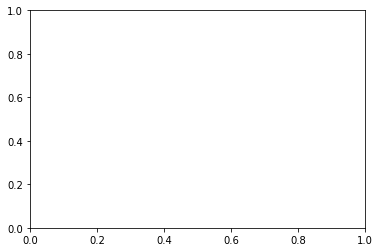

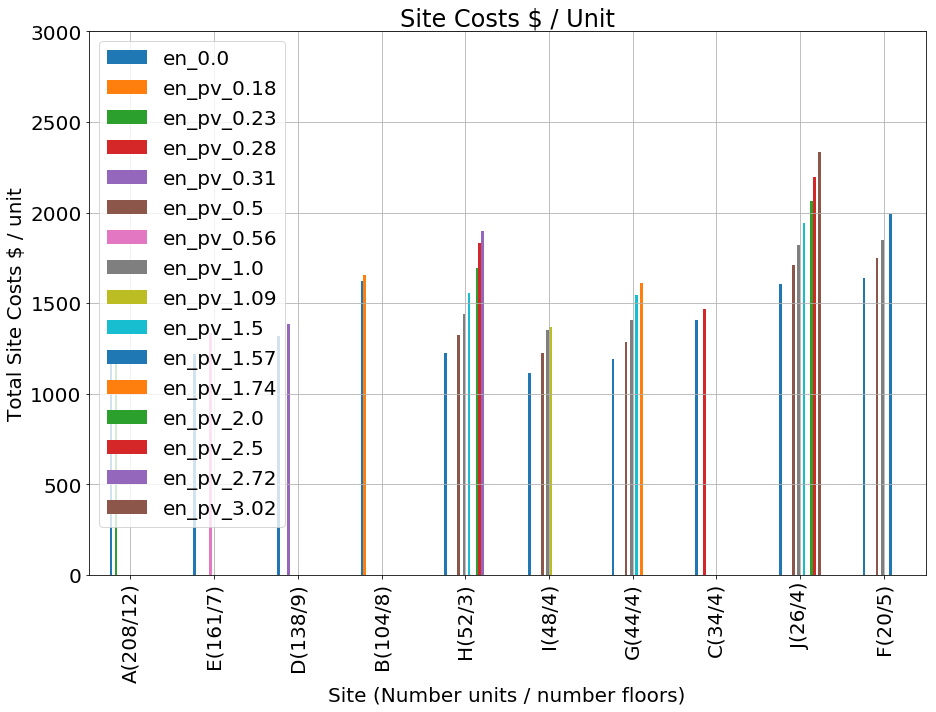

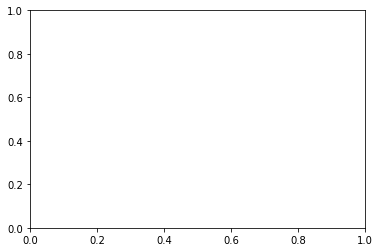

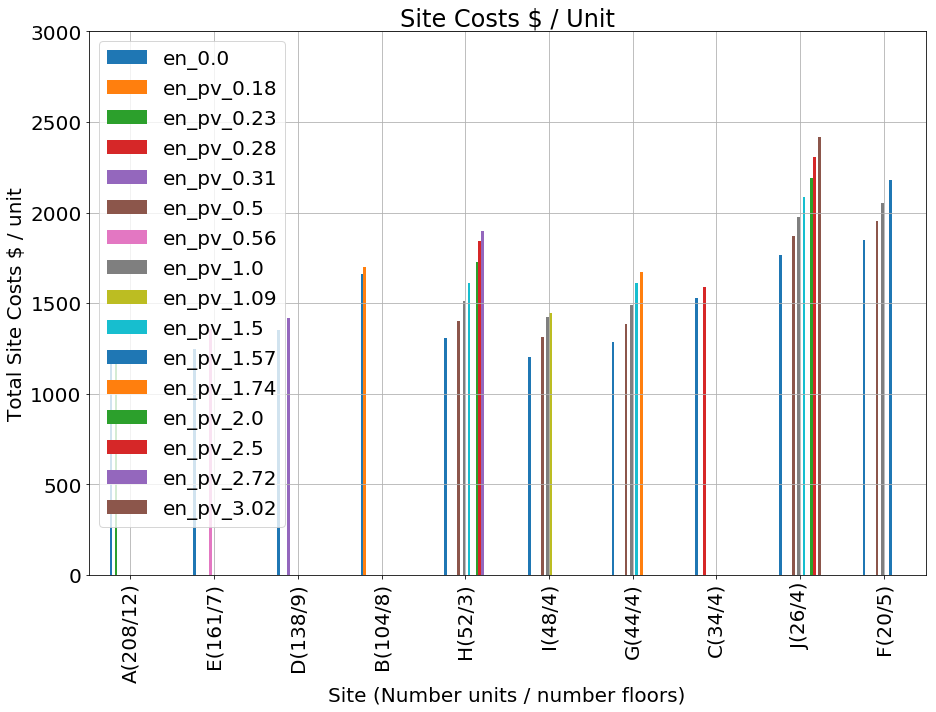

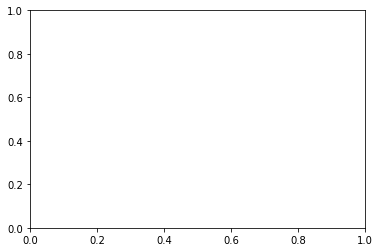

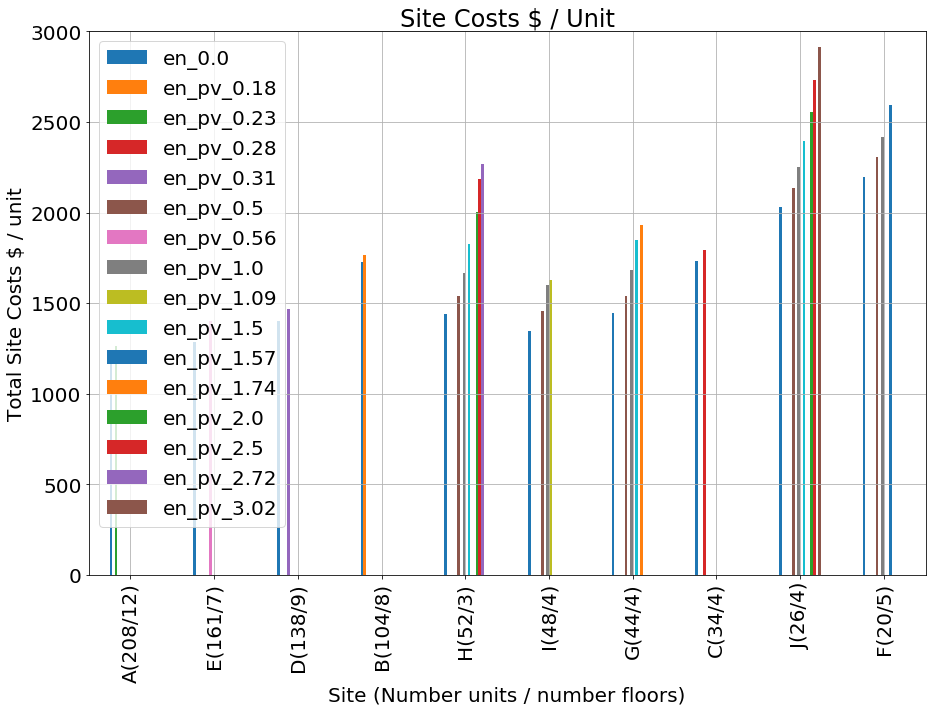

In [14]:

for parent, capex  in zip (parents, en_capexes):   
    title = parent + " / " + capex                        
    p_slice = df['parent'] == parent 
    c_slice = df['en_capex_id'] == capex
    dfx=df.copy()[p_slice & c_slice]
    
    # Get rid of duplicates - assumed irrelevant as only variation is internal tariffs
    dfx.loc[:,'kwp_str'] = dfx.loc[:,'kwp_unit'].apply(lambda x : str(round(x,2)))
    dfx['combined'] = dfx['site']+ '_' + dfx['arrangement'] + '_'+ dfx['kwp_str']
    dfx['arr_pv'] = dfx['arrangement'] + '_'+ dfx['kwp_str']
    dfx = dfx.drop_duplicates('combined')
    #fx['combined'] = dfx['combined'].apply(lambda x: x[1:])
    
    
    # ----------------------
    # reindex and stack data
    # ----------------------
    dfx.index = [dfx.label,dfx.arr_pv]
    dfu = dfx['$_unit'].unstack()



    # --------------------------
    # Choose order of categories
    # --------------------------
    dfu = dfu.loc[[labels[s] for s in sites],:]

    
    # Plotting set-up parameters
    cmap = mpl.cm.tab10
    alpha=1

    arr_list = dfx['combined'].apply(lambda x : x[1:]).tolist()
    fig, ax = plt.subplots()
    ax = dfu.plot(kind='bar',figsize=(15, 10), fontsize=20)
    ax.set_xlabel("PV size (kWp / unit))", fontsize=20)
    ax.set_ylabel("Total Site Costs ($/unit)", fontsize=20)
    ax.set_title ("Site Costs $ / Unit",fontsize=24)
    ax.legend(fontsize=14)
    ax.grid(True)
    ax.set_ylim((0,3000))
    #fig.show()
    pname = study_name +'_en_'+ parent+'_' + capex + '.png'
    plotFile = os.path.join(self.plot_path,pname)
    plt.savefig(plotFile,dpi=1000)



Output is not much use.
Could try plotting $ cost vs kWp with coloour per site?

Index(['en_0.0', 'en_pv_0.18', 'en_pv_0.23', 'en_pv_0.28', 'en_pv_0.31',
       'en_pv_0.5', 'en_pv_0.56', 'en_pv_1.0', 'en_pv_1.09', 'en_pv_1.5',
       'en_pv_1.57', 'en_pv_1.74', 'en_pv_2.0', 'en_pv_2.5', 'en_pv_2.72',
       'en_pv_3.02'],
      dtype='object', name='arr_pv')

In [50]:
sites

['A', 'E', 'D', 'B', 'H', 'I', 'G', 'C', 'J', 'F']

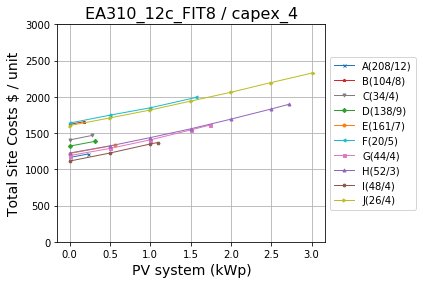

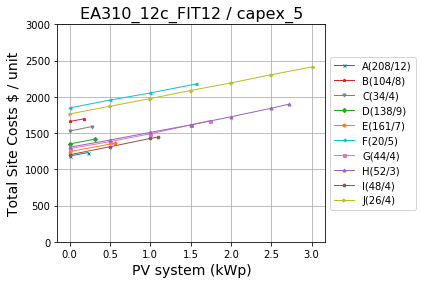

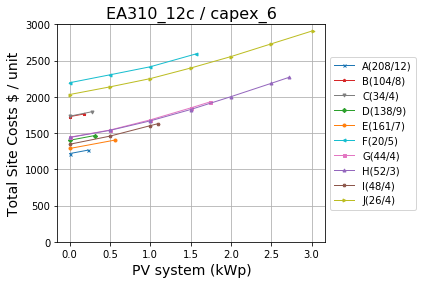

In [106]:
for parent, capex  in zip (parents, en_capexes):   
    title = parent + " / " + capex                        
    p_slice = df['parent'] == parent 
    c_slice = df['en_capex_id'] == capex
    dfx=df.copy()[p_slice & c_slice]
    
    # Get rid of duplicates - assumed irrelevant as only variation is internal tariffs
    dfx.loc[:,'kwp_str'] = dfx.loc[:,'kwp_unit'].apply(lambda x : str(round(x,2)))
    dfx['combined'] = dfx['site']+ '_' + dfx['arrangement'] + '_'+ dfx['kwp_str']
    dfx['arr_pv'] = dfx['arrangement'] + '_'+ dfx['kwp_str']
    dfx = dfx.drop_duplicates('combined')
    #fx['combined'] = dfx['combined'].apply(lambda x: x[1:])
    
    
    # ----------------------
    # reindex and stack data
    # ----------------------
    dfx.index = [dfx.label,dfx.arr_pv]
    dfu = dfx['$_unit'].unstack()

    cols =dfu.columns
    cols = [c[3:] for c in cols ]
    cols = [0.0]+[float(c[3:]) for c in cols if 'pv' in c]
    dfu.columns=cols
    dfv=dfu.transpose()
    dfv


    fig, ax = plt.subplots()
    for label in [c for c in dfv.columns if 'colour' not in c]:       
        y = dfv[label].dropna()
        x = y.index
        #dfv['colour'] = sites.index(label[0])
        line = ax.plot(x,y,   alpha=alpha,  c = site_colours[label[0]],linewidth = 1, marker = site_markers[label[0]], markersize=3)
        #scat = ax.scatter(x, y, s=2,  cmap=cmap, alpha=alpha,  c = site_colours[label[0]], marker = site_markers[label[0]])  
    ax.set_title(title, fontsize=16, y=1.0)
    ax.set_xlabel("PV system (kWp)", fontsize=14)
    ax.set_ylabel("Total Site Costs $ / unit", fontsize=14)
    # Legend outside box and resize chart to fit
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.grid(True)
    ax.set_ylim((0,3000))
    pname = study_name +'_aterm_'+ parent+'_' + capex + '.png'
    plotFile = os.path.join(self.plot_path,pname)
    plt.savefig(plotFile,dpi=1000)

In [93]:
dfv[labels['A']].dropna()

0.00    1217.240419
0.23    1265.010493
Name: A(208/12), dtype: float64